# Tutorial 11: Risk Parity Portfolio Optimization with Risk Factors using Stepwise Regression

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Tickers of factors

factors = ['MTUM', 'QUAL', 'VLUE', 'SIZE', 'USMV']
factors.sort()

tickers = assets + factors
tickers.sort()

# Downloading data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers

[*********************100%%**********************]  30 of 30 completed


In [2]:
# Calculating returns

X = data[factors].pct_change().dropna()
Y = data[assets].pct_change().dropna()

display(X.head())

,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,
2016-01-05,0.4735%,0.2672%,0.0000%,0.6780%,0.1635%
2016-01-06,-0.5267%,-1.1914%,-0.5380%,-0.6253%,-1.8277%
2016-01-07,-2.2294%,-2.3798%,-1.7181%,-1.6215%,-2.1609%
2016-01-08,-0.9548%,-1.1377%,-1.1978%,-1.0086%,-1.0873%
2016-01-11,0.6043%,0.1479%,-0.5898%,0.1491%,-0.6183%


## 2. Estimating Mean Variance Portfolios

### 2.1 Estimating the loadings matrix.

In [3]:
import riskfolio as rp

step = 'Forward' # Could be Forward or Backward stepwise regression
loadings = rp.loadings_matrix(X=X, Y=Y, stepwise=step)

loadings.style.format("{:.4f}").background_gradient(cmap='RdYlGn')

,const,MTUM,QUAL,SIZE,USMV,VLUE
APA,-0.0006,-0.6551,0.0000,0.9406,-0.7883,1.7237
BA,0.0005,0.0000,1.1744,0.3616,-0.4322,0.0000
BAX,0.0003,0.3146,0.0000,0.0000,0.7717,0.0000
BMY,-0.0003,0.0000,0.8123,0.0000,0.0000,0.0000
CMCSA,0.0001,0.0000,0.4958,0.0000,0.4962,0.0000
CNP,0.0001,-0.5595,-0.2157,0.0000,1.8341,0.0000
CPB,-0.0003,-0.4782,-0.5993,0.0000,2.0793,0.0000
DE,0.0004,0.0000,0.0000,0.3631,0.0000,0.8090
HPQ,0.0002,0.0000,0.0000,0.0000,0.0000,1.2514
JCI,0.0001,0.0000,0.0000,0.3411,0.0000,0.5797


이 코드는 Riskfolio 라이브러리를 사용하여 단계적 회귀(stepwise regression)를 통해 로딩 행렬을 계산하는 과정을 보여줍니다. 단계적 회귀는 변수 선택 방법 중 하나로, 모델에 포함할 변수를 선택하는 과정입니다. 이 코드는 주어진 데이터 X와 Y를 기반으로 로딩 행렬을 생성합니다.

### 코드 설명

1. **라이브러리 임포트**
   ```python
   import riskfolio as rp
   ```

   - Riskfolio 라이브러리를 임포트합니다.

2. **단계적 회귀 방식 설정**
   ```python
   step = 'Forward'  # Could be Forward or Backward stepwise regression
   ```

   - `step`: 단계적 회귀의 방식을 설정합니다. 
     - `'Forward'`: 전진 선택법(Forward Selection). 변수를 하나씩 추가하면서 모델의 성능을 평가합니다.
     - `'Backward'`: 후진 제거법(Backward Elimination). 모든 변수를 포함한 상태에서 하나씩 제거하면서 모델의 성능을 평가합니다.

3. **로딩 행렬 계산**
   ```python
   loadings = rp.loadings_matrix(X=X, Y=Y, stepwise=step)
   ```

   - `rp.loadings_matrix`: Riskfolio 라이브러리에서 제공하는 함수로, 주어진 데이터 X와 Y를 사용하여 로딩 행렬을 계산합니다.
   - `X`: 독립 변수 데이터 프레임.
   - `Y`: 종속 변수 데이터 프레임.
   - `stepwise`: 단계적 회귀의 방식을 설정합니다. 여기서는 'Forward'로 설정되어 있습니다.

4. **로딩 행렬 시각화**
   ```python
   loadings.style.format("{:.4f}").background_gradient(cmap='RdYlGn')
   ```

   - `loadings`: 계산된 로딩 행렬입니다.
   - `style.format("{:.4f}")`: 소수점 4자리까지 포맷팅합니다.
   - `background_gradient(cmap='RdYlGn')`: 로딩 행렬의 값을 시각적으로 강조하기 위해 색상 그라디언트를 적용합니다. 'RdYlGn' 색상 맵을 사용하여 값을 시각화합니다.

### 단계적 회귀 (Stepwise Regression)

단계적 회귀는 회귀 모델의 변수를 선택하는 방법 중 하나로, 변수를 추가하거나 제거하여 모델의 성능을 최적화합니다.

#### 전진 선택법 (Forward Selection)

1. **시작**: 변수가 없는 상태에서 시작합니다.
2. **변수 추가**: 각 단계에서 모델에 가장 크게 기여하는 변수를 추가합니다.
3. **종료 조건**: 더 이상 유의미한 변수가 없을 때까지 반복합니다.

#### 후진 제거법 (Backward Elimination)

1. **시작**: 모든 변수를 포함한 상태에서 시작합니다.
2. **변수 제거**: 각 단계에서 모델에 가장 적게 기여하는 변수를 제거합니다.
3. **종료 조건**: 모든 남은 변수가 유의미할 때까지 반복합니다.

### 예시

```python
import pandas as pd
import riskfolio as rp

# 예제 데이터 생성
X = pd.DataFrame({
    'Factor1': [0.1, 0.2, 0.3, 0.4, 0.5],
    'Factor2': [0.5, 0.4, 0.3, 0.2, 0.1],
    'Factor3': [0.2, 0.3, 0.4, 0.5, 0.6]
})
Y = pd.DataFrame({
    'Asset1': [0.02, 0.03, 0.05, 0.07, 0.09],
    'Asset2': [0.01, 0.02, 0.03, 0.04, 0.05]
})

# 단계적 회귀 방식 설정
step = 'Forward'  # 또는 'Backward'

# 로딩 행렬 계산
loadings = rp.loadings_matrix(X=X, Y=Y, stepwise=step)

# 로딩 행렬 시각화
loadings.style.format("{:.4f}").background_gradient(cmap='RdYlGn')
```

### 요약

- **단계적 회귀 방식 설정**: 전진 선택법('Forward') 또는 후진 제거법('Backward')을 설정합니다.
- **로딩 행렬 계산**: 독립 변수와 종속 변수를 사용하여 로딩 행렬을 계산합니다.
- **로딩 행렬 시각화**: 계산된 로딩 행렬을 소수점 4자리까지 포맷팅하고 색상 그라디언트를 적용하여 시각화합니다.

이 코드를 통해 단계적 회귀를 사용하여 데이터의 주요 요인들을 선택하고, 이들이 종속 변수에 미치는 영향을 이해할 수 있습니다.

### 2.2 Calculating the portfolio that maximizes Sharpe ratio.

In [4]:
# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

port.factors = X
port.factors_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='FM' # Factor Model
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,5.9508%,11.8687%,0.0000%,0.0000%,9.7092%,0.0000%,4.3627%,0.0000%,0.0000%,...,10.4799%,0.0000%,0.0000%,0.0000%,0.0000%,5.5105%,1.3028%,0.0000%,4.0985%,0.0000%


### 2.3 Plotting portfolio composition

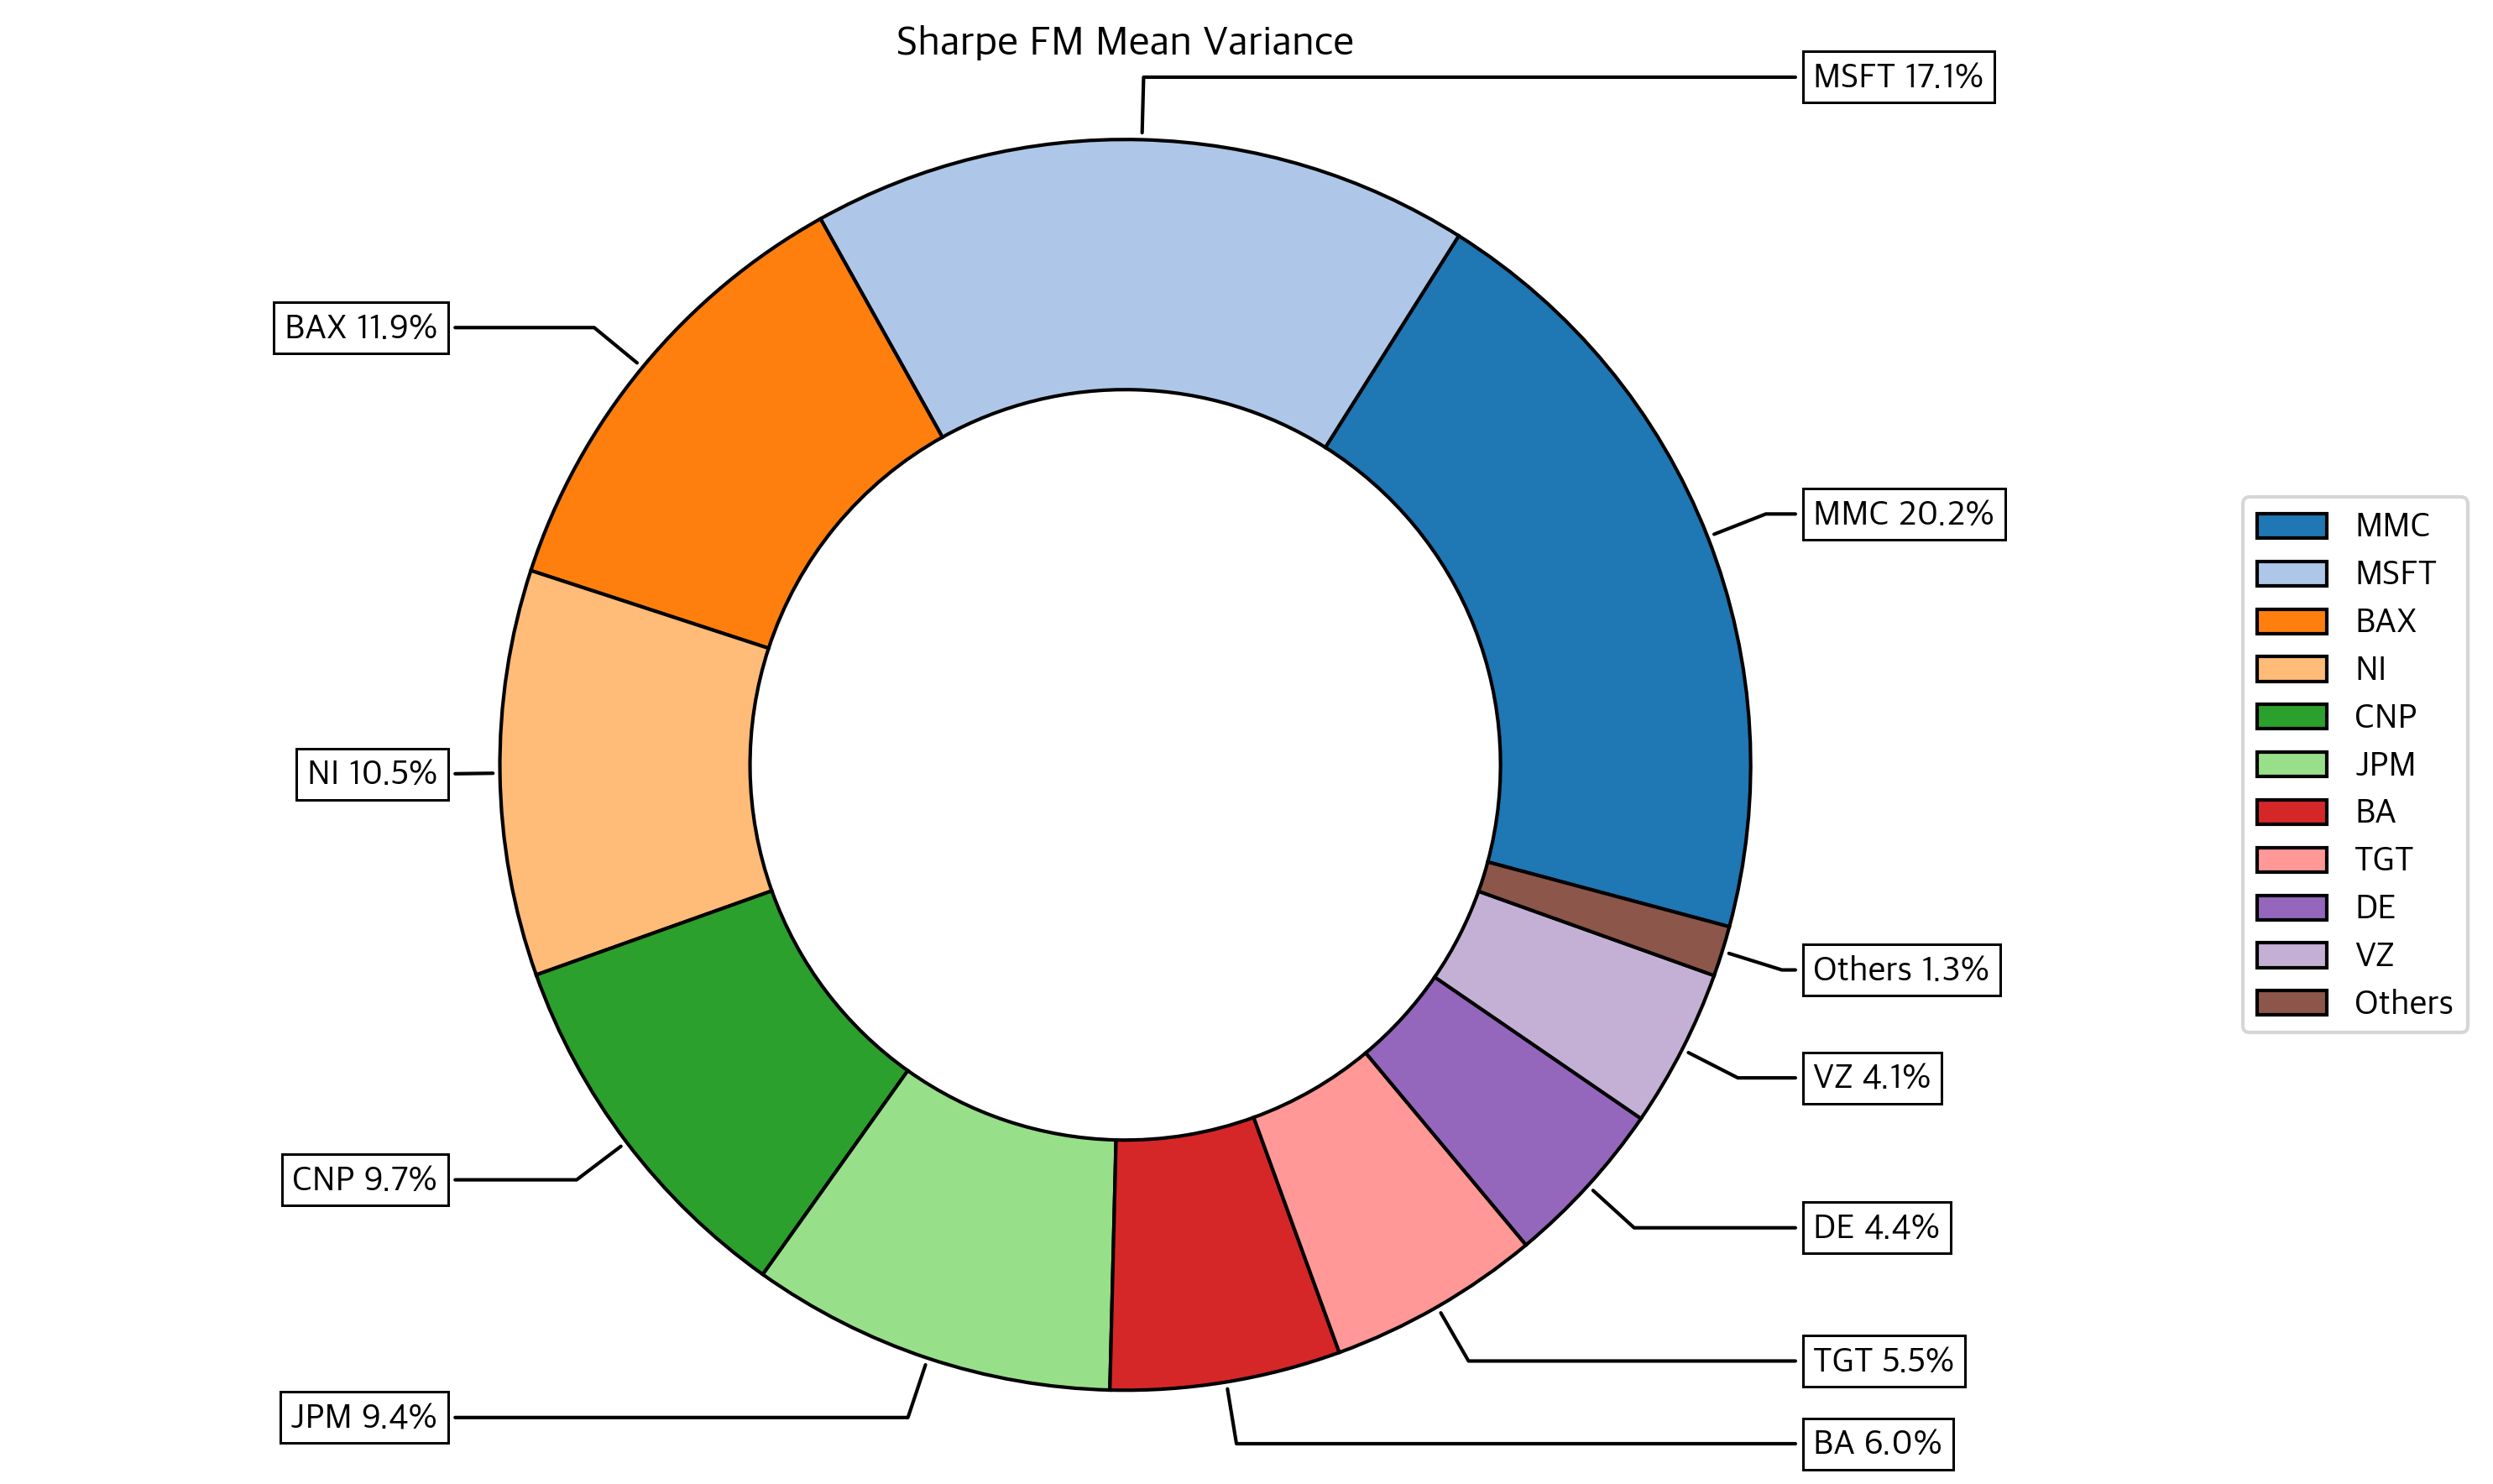

In [5]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe FM Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Plotting Risk Contribution

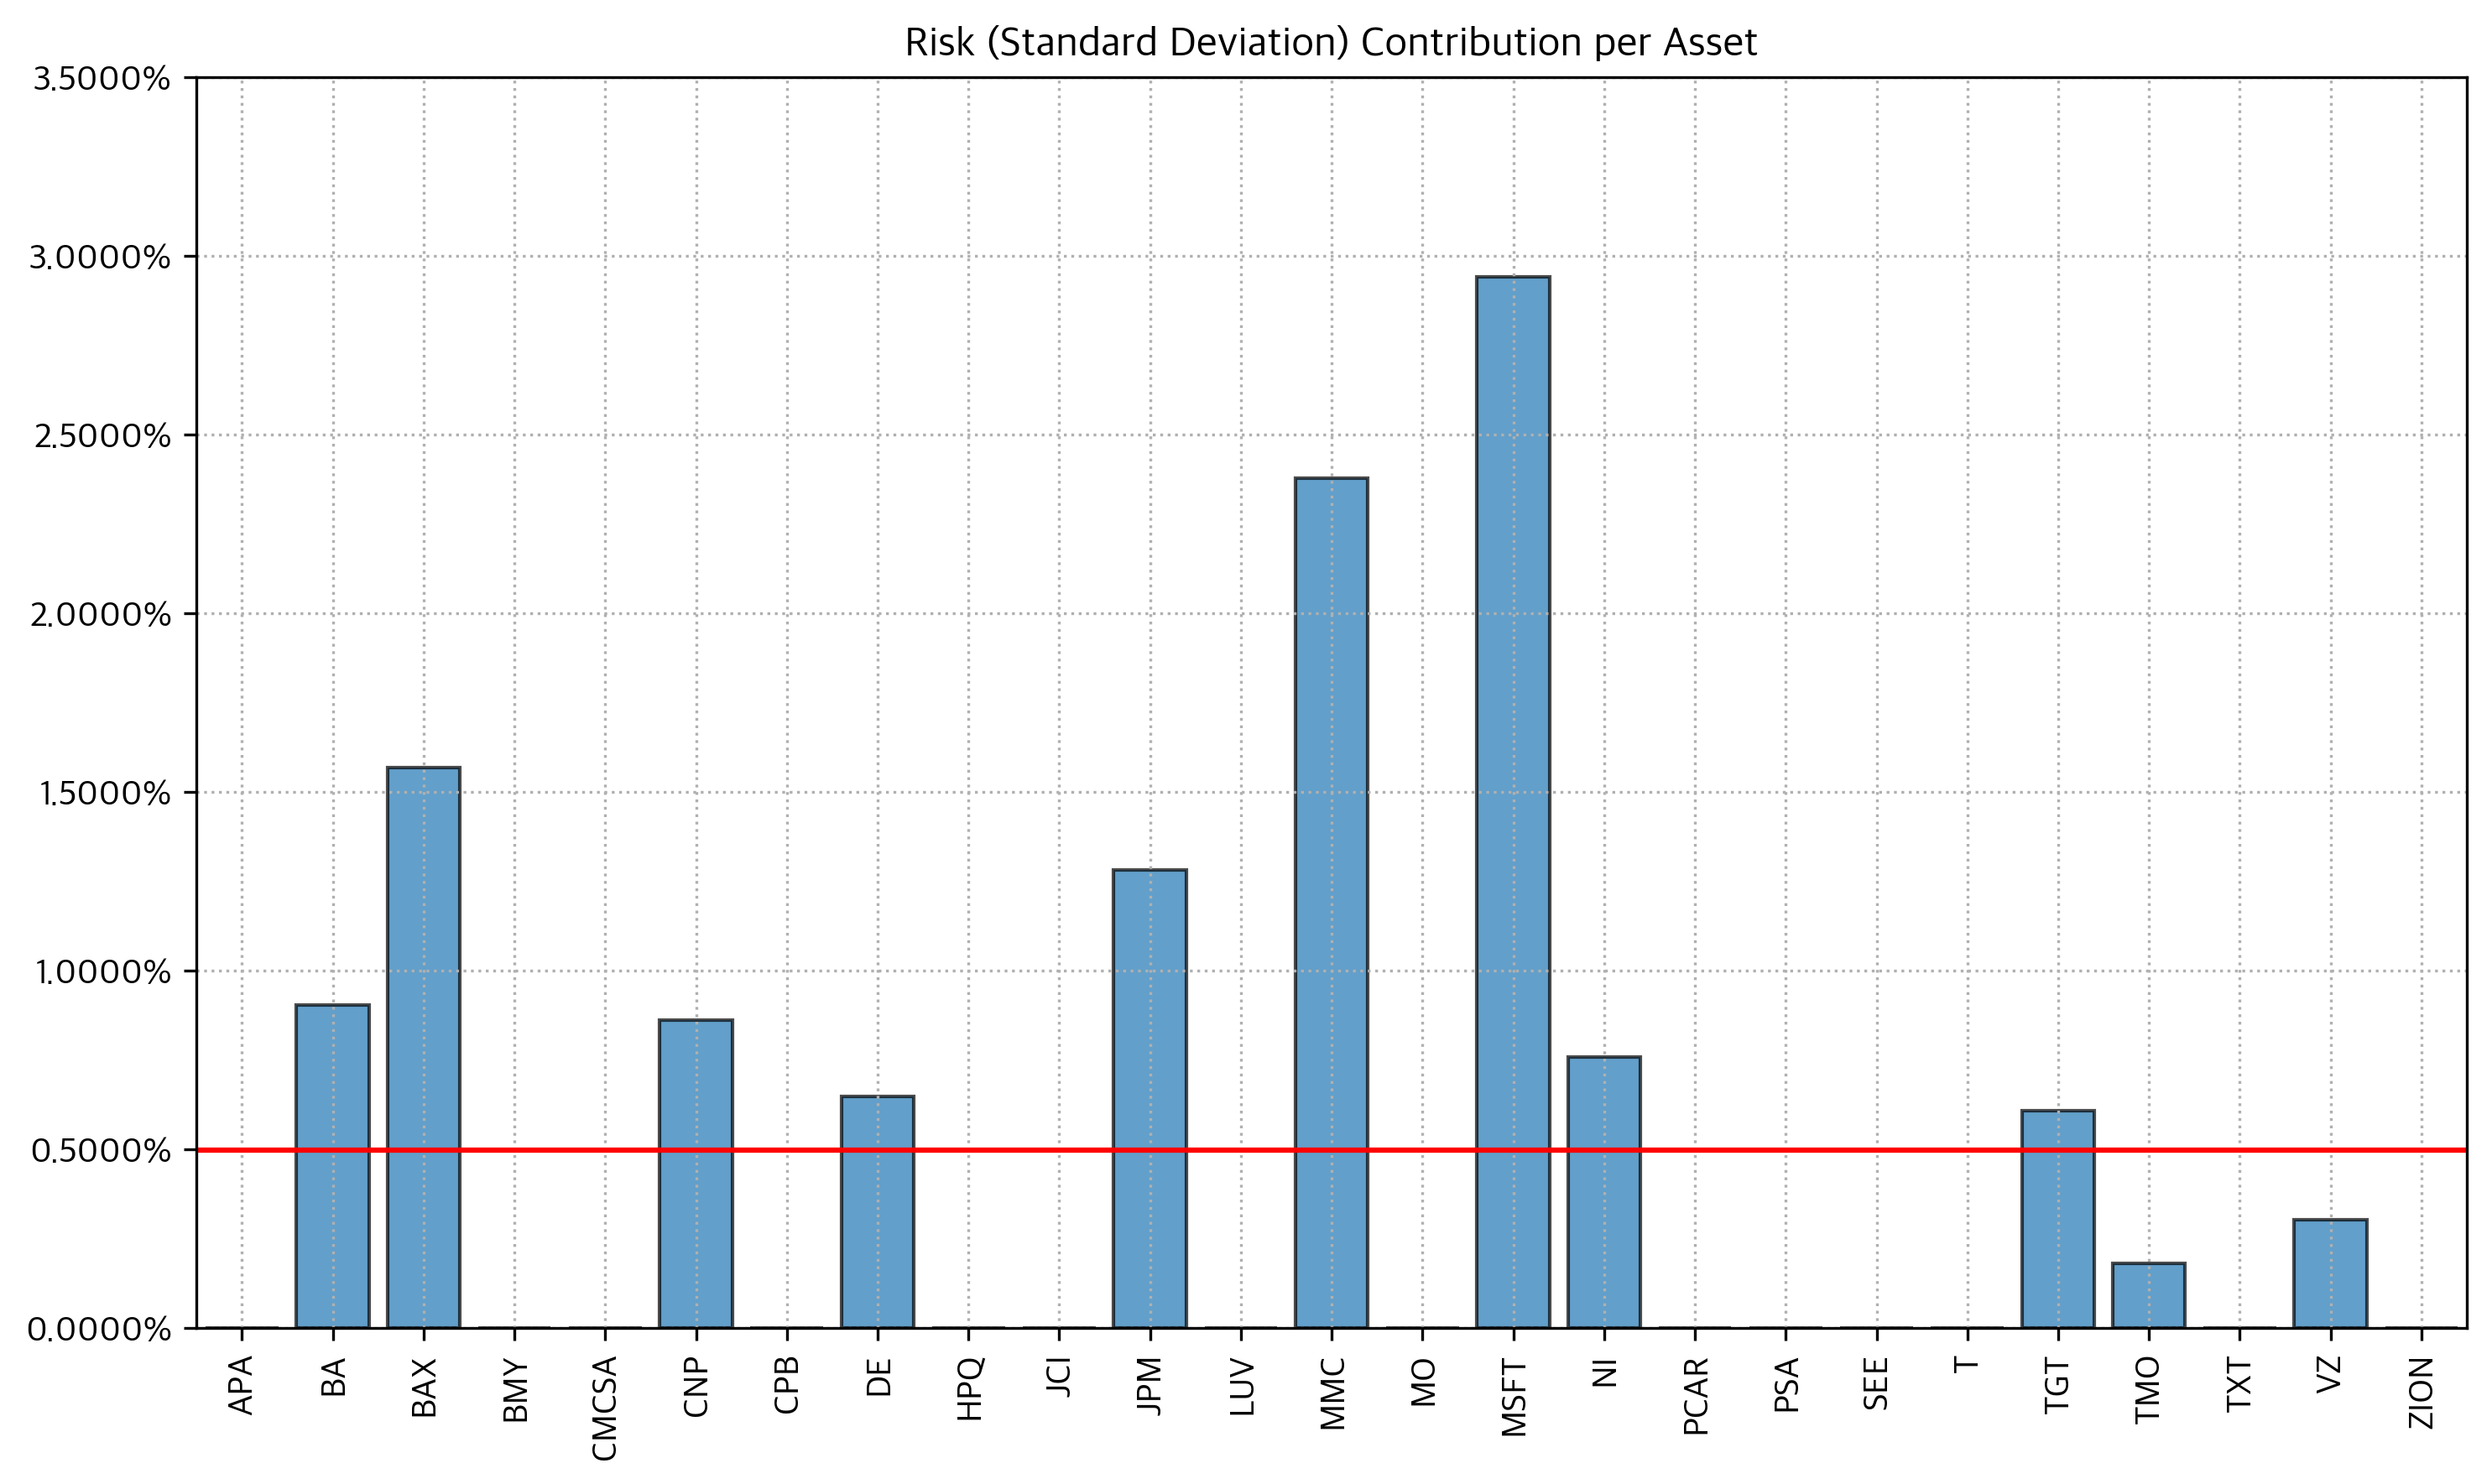

In [6]:
# Plotting the risk composition of the portfolio

ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

## 3. Estimating Risk Parity Portfolios Using Risk Factors with Other Risk Measures

이 부분에서는 팩터 모델을 사용하여 리스크 패리티 포트폴리오를 계산할 것입니다. 먼저 분산을 리스크 측정 방법으로 사용할 때 리스크 패리티 포트폴리오를 계산한 후, 사용 가능한 모든 리스크 측정 방법에 대해 리스크 패리티 포트폴리오를 계산할 것입니다.

### 3.1 Calculating the risk parity portfolio for variance.

In [7]:
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w_rp.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,2.3351%,3.1186%,3.9877%,4.0281%,4.0297%,5.3656%,5.2662%,3.0160%,2.7124%,3.7665%,...,6.5955%,3.0652%,6.6766%,3.6181%,4.7122%,3.8286%,3.3389%,3.0020%,5.4390%,3.0063%


### 3.2 Plotting portfolio composition

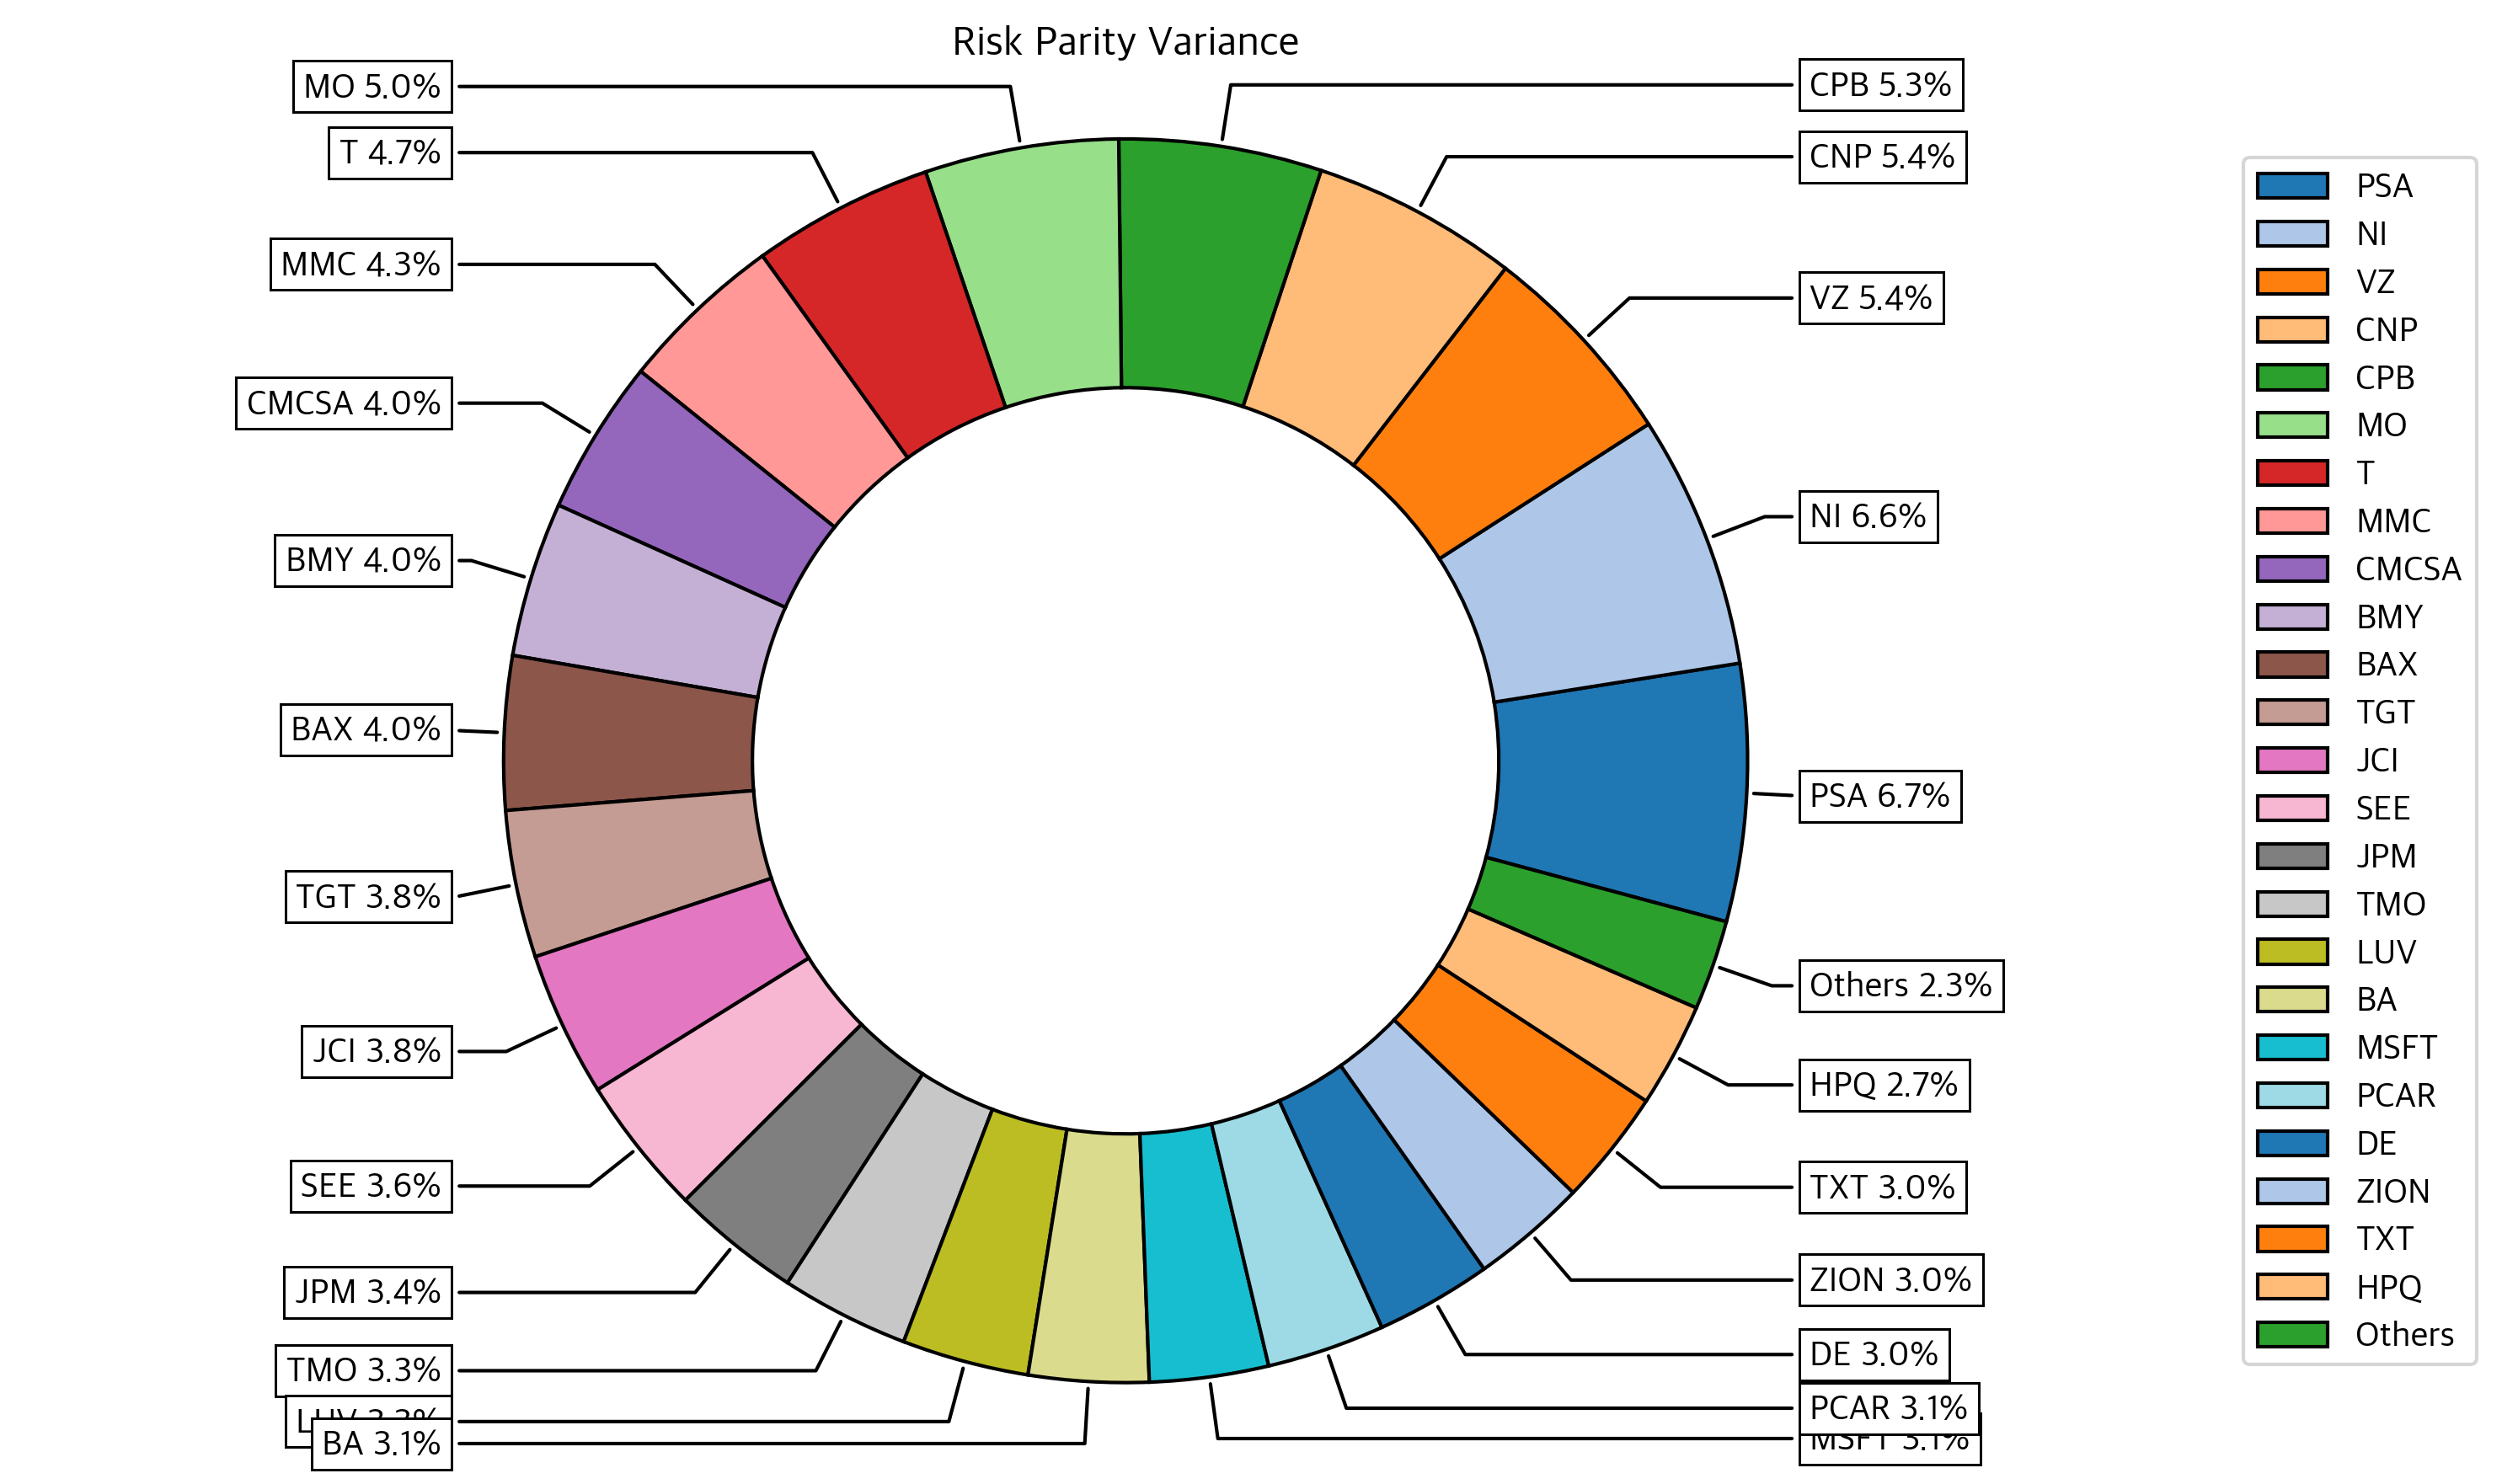

In [8]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 Plotting Risk Composition

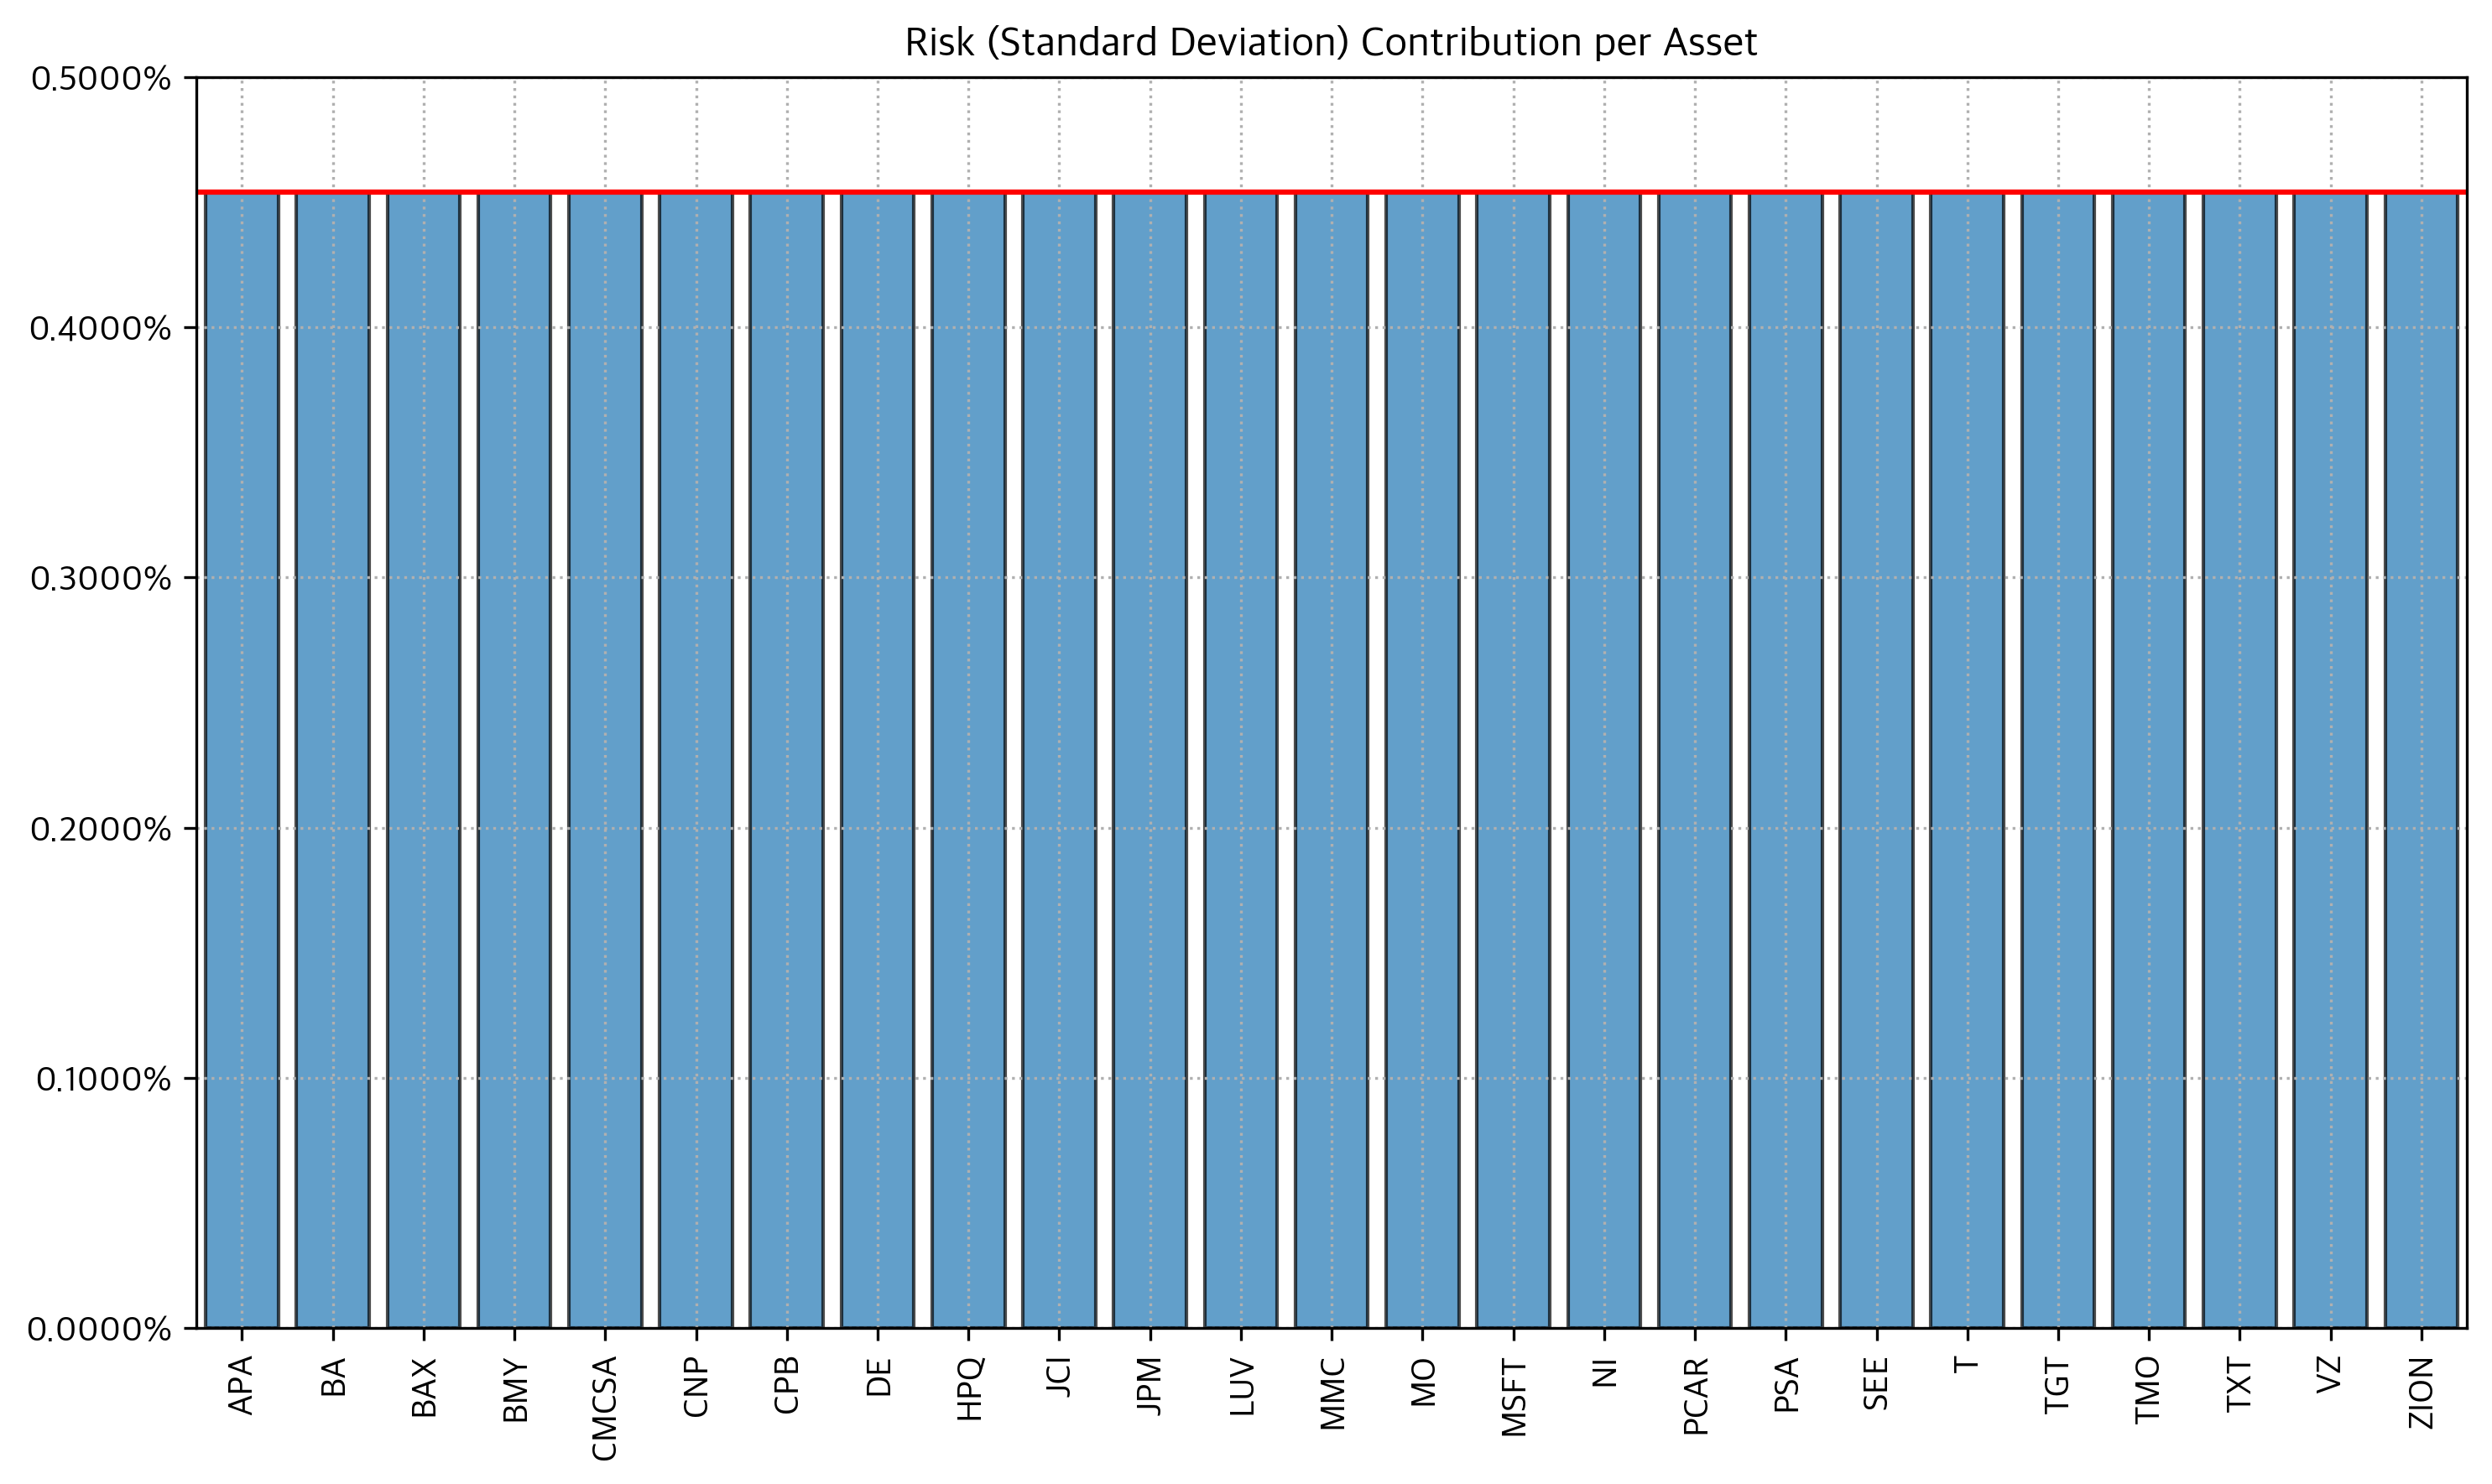

In [9]:
ax = rp.plot_risk_con(w_rp, cov=port.cov_fm, returns=port.returns_fm, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

### 3.4 Calculate Optimal Portfolios for Several Risk Measures.

In [10]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

# port.reset_linear_constraints() # To reset linear constraints (factor constraints)

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'EVaR', 'CVaR', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = False

for i in rms:
    w = port.rp_optimization(model=model, rm=i, rf=rf, b=b, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [11]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,EVaR,CVaR,CDaR,UCI,EDaR
APA,2.34%,2.31%,2.38%,2.09%,2.26%,2.74%,2.27%,1.60%,1.49%,1.40%
BA,3.12%,3.13%,2.98%,3.34%,3.05%,3.24%,2.88%,2.96%,3.42%,2.42%
BAX,3.99%,3.98%,3.75%,4.26%,3.85%,3.73%,3.71%,4.27%,4.99%,3.71%
BMY,4.03%,4.51%,4.30%,4.21%,4.15%,4.40%,4.03%,3.18%,3.03%,2.77%
CMCSA,4.03%,4.10%,3.94%,4.17%,3.95%,3.98%,3.83%,3.72%,3.89%,3.27%
CNP,5.37%,5.08%,5.31%,5.30%,5.46%,4.98%,5.60%,6.78%,6.61%,7.34%
CPB,5.27%,5.99%,6.34%,5.62%,6.23%,5.57%,6.65%,6.35%,5.22%,7.32%
DE,3.02%,2.91%,2.86%,3.05%,2.91%,3.13%,2.82%,2.87%,3.27%,2.43%
HPQ,2.71%,2.58%,2.55%,2.61%,2.55%,2.77%,2.50%,2.26%,2.40%,1.97%
JCI,3.77%,3.74%,3.67%,3.71%,3.65%,3.97%,3.57%,3.20%,3.32%,2.76%


<Axes: >

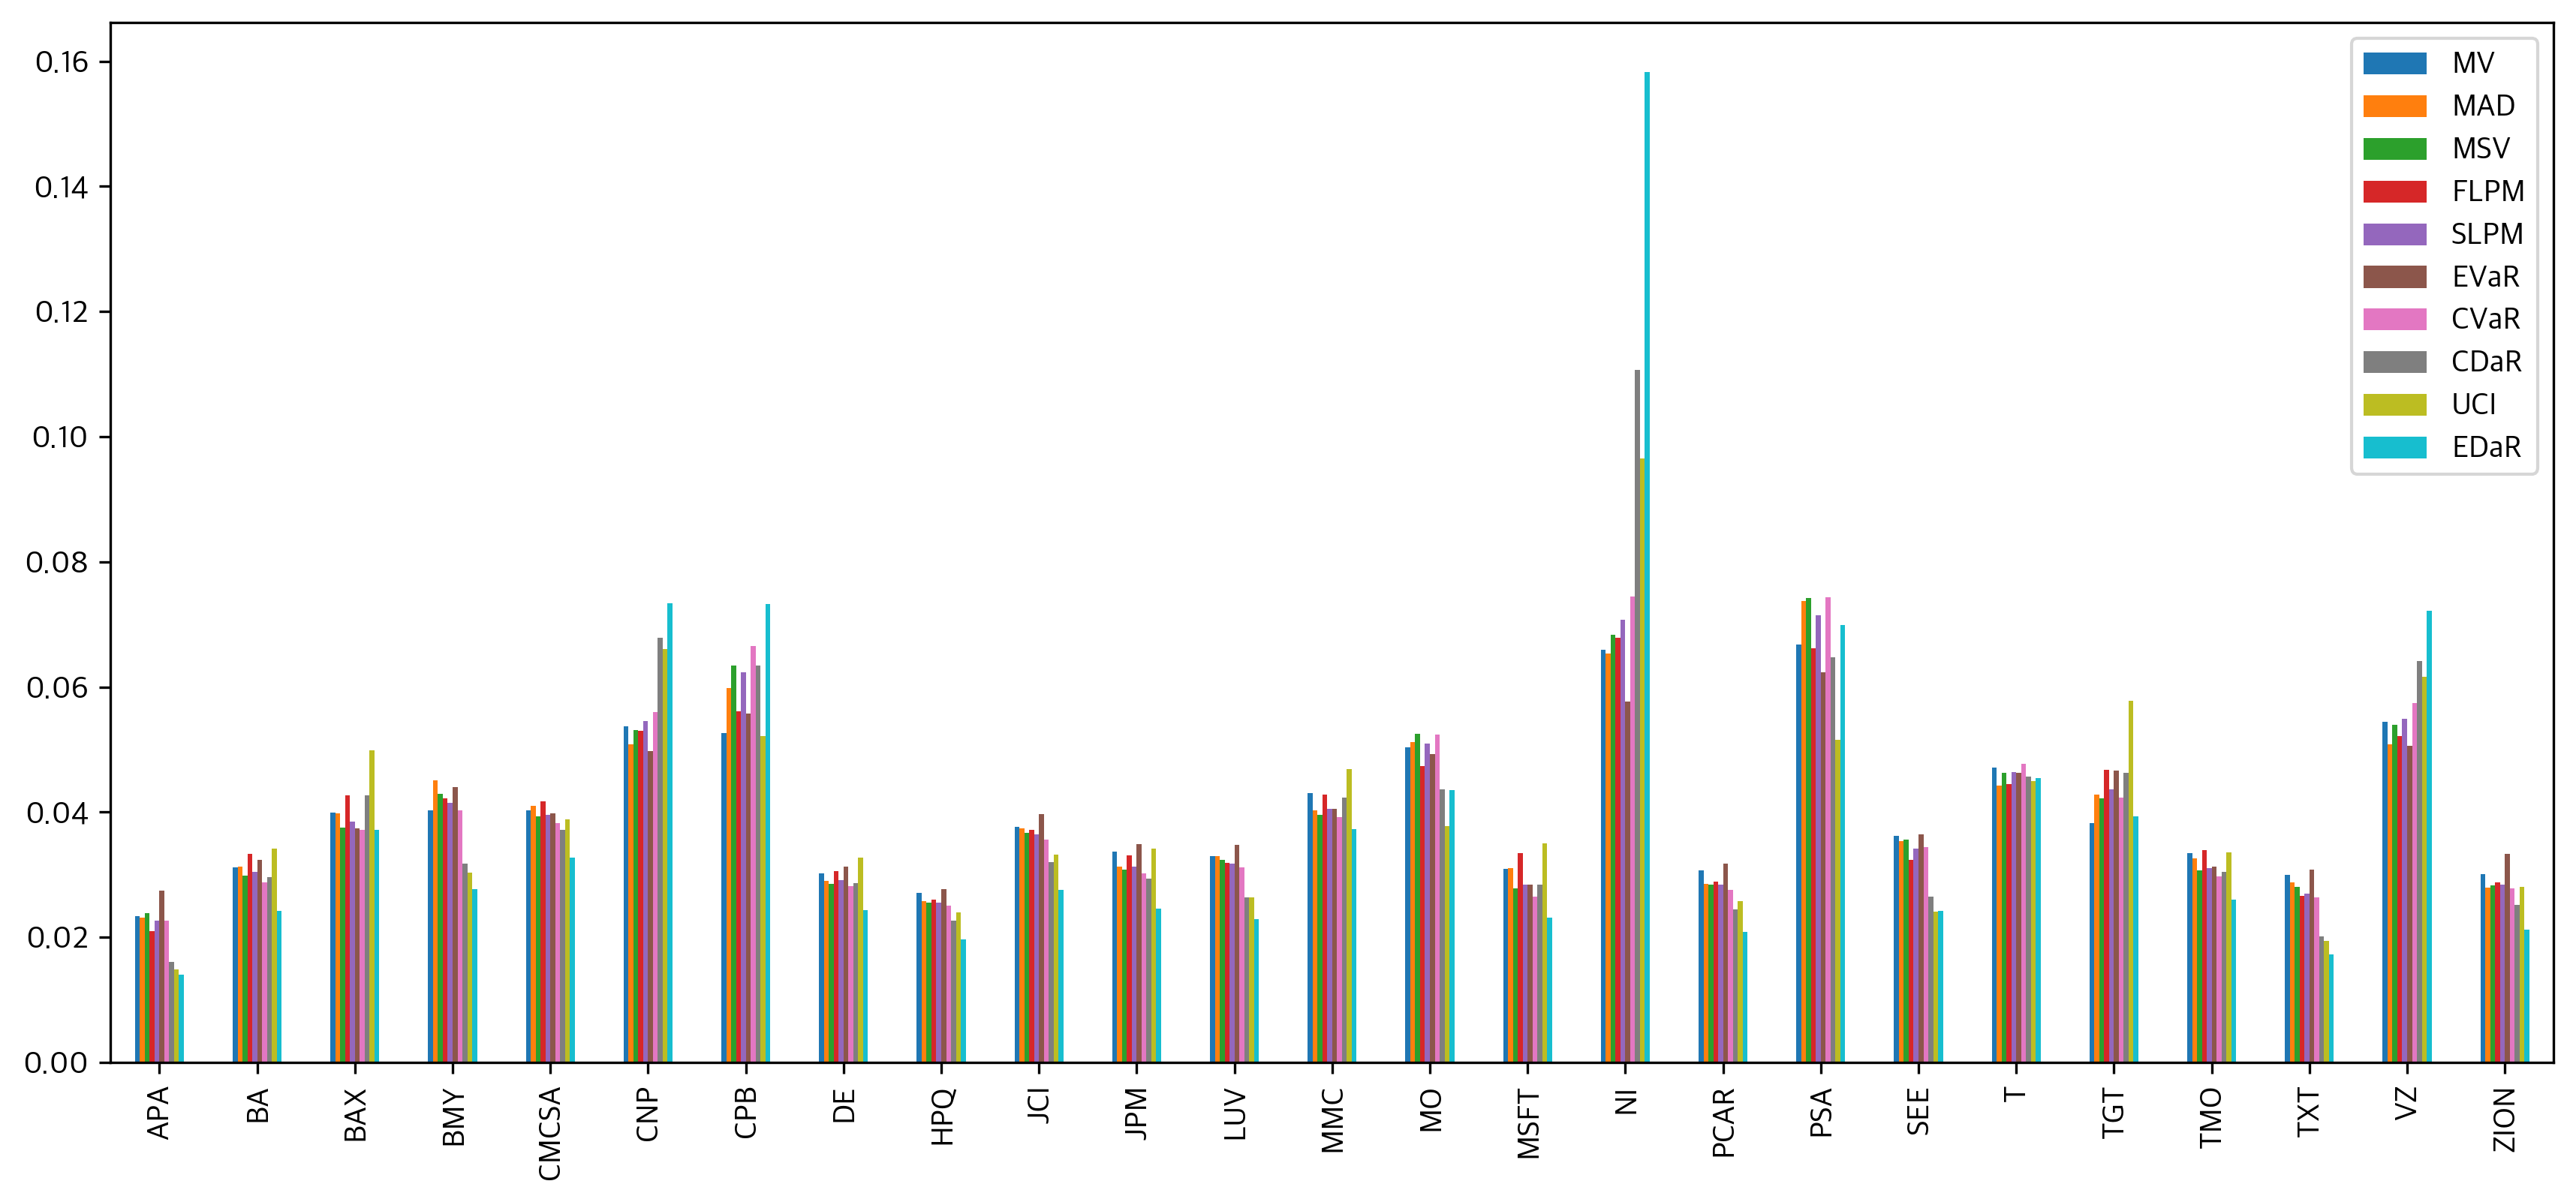

In [12]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)